### Теория вероятностей и математическая статистика. Урок 7. Многомерный статистический анализ. Линейная регрессия

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = X.shape[0]

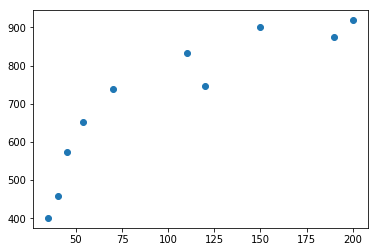

In [40]:
plt.scatter(X,y)
plt.show()

In [74]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)                                                
b

2.620538882402765

In [75]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

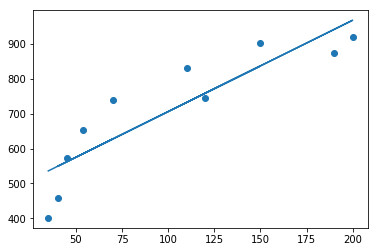

In [76]:
y_pred = a + b * X
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [48]:
def mse_(w1, y = y, X = X, n = n):
    return np.sum((w1*X-y)**2)/n

In [49]:
mse_(2.620538882402765)

203763.93896082853

In [50]:
alpha = 1e-6
w1 = 0.1

In [56]:
for i in range(1000):
    w1 -= alpha * (2/n) * np.sum((w1*X-y)*X)
    if i%100 == 0:
        print('Iter:{} w1 = {}, mse = {}'.format(i, w1, mse_(w1)))

Iter:0 w1 = 5.877769553381888, mse = 56518.85910026643
Iter:100 w1 = 5.889083189387522, mse = 56516.86590342786
Iter:200 w1 = 5.88977531888123, mse = 56516.8584437427
Iter:300 w1 = 5.889817660992628, mse = 56516.85841582429
Iter:400 w1 = 5.889820251337954, mse = 56516.8584157198
Iter:500 w1 = 5.889820409806407, mse = 56516.8584157194
Iter:600 w1 = 5.889820419500961, mse = 56516.8584157194
Iter:700 w1 = 5.8898204200940425, mse = 56516.85841571941
Iter:800 w1 = 5.889820420130325, mse = 56516.85841571941
Iter:900 w1 = 5.889820420132545, mse = 56516.85841571941


#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Для вычисления доверительных интервалов и проверки статистических гипотез применяют таблицу критических точек распределения Стьюдента. С увеличением числа степеней свободы распределения Стьюдента приближаются к нормальному и при n>30 его практически можно заменить нормальным — используют таблицу Лапласа.